In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/creditcard.csv')


In [3]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
print(round(df['Class'].value_counts()[0] / len(df) * 100, 2))

99.83


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

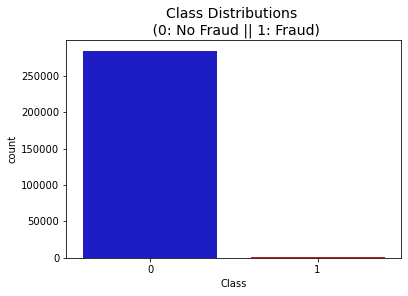

In [5]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

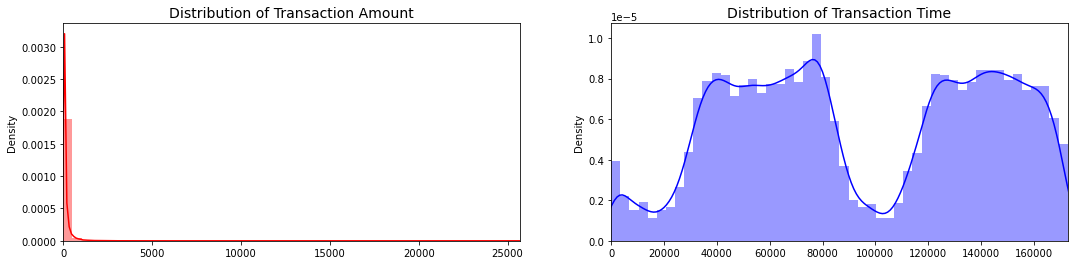

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()



In [7]:
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1, 1))
df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [8]:
df[['scaled_amount', 'scaled_time']]

,scaled_amount,scaled_time
0,1.783274,-0.994983
1,-0.269825,-0.994983
2,4.983721,-0.994972
3,1.418291,-0.994972
4,0.670579,-0.994960
...,...,...
284802,-0.296653,1.034951
284803,0.038986,1.034963
284804,0.641096,1.034975
284805,-0.167680,1.034975


In [9]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']
df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [10]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

X = df.drop('Class', axis=1)
y = df['Class']
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test: ", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test:  [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test:  [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test:  [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test:  [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test:  [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [11]:
df = df.sample(frac=1)
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]
balanced_df = pd.concat([fraud_df, non_fraud_df])
new_df = balanced_df.sample(frac=1, random_state=1)
new_df.describe()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,1.144298,0.035166,-2.404899,1.808079,-3.540418,2.211647,-1.576768,-0.701548,-2.779955,0.309027,...,0.191590,0.344901,0.025564,-0.001757,-0.048889,-0.000354,0.035060,0.065508,0.038960,0.500000
std,3.204621,0.566031,5.514049,3.702602,6.205029,3.229585,4.192511,1.739509,5.846217,4.846109,...,1.076455,2.779476,1.173411,1.171581,0.572616,0.680004,0.482203,1.044513,0.475945,0.500254
min,-0.307413,-0.993679,-30.552380,-8.919475,-31.103685,-4.544968,-22.105532,-6.406267,-43.557242,-41.044261,...,-6.488766,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.228285,-7.263482,-1.869290,0.000000
25%,-0.289387,-0.460538,-2.990714,-0.208504,-5.084967,-0.132610,-1.853148,-1.604110,-3.031843,-0.202834,...,-0.186292,-0.197009,-0.546312,-0.227356,-0.416052,-0.336412,-0.283751,-0.068271,-0.062677,0.000000
50%,-0.074687,-0.059387,-0.803272,0.993667,-1.429976,1.200120,-0.420150,-0.639088,-0.675826,0.157486,...,0.015401,0.148728,0.030677,-0.010091,0.010639,0.044969,-0.001175,0.052928,0.032575,0.500000
75%,1.089779,0.592168,1.042892,2.804137,0.358568,4.229802,0.439611,0.024065,0.229140,0.879928,...,0.441202,0.686496,0.610014,0.220380,0.404023,0.381300,0.353986,0.428015,0.226309,1.000000
max,29.398030,1.030181,2.360991,22.057729,3.667979,12.114672,11.095089,6.474115,5.802537,20.007208,...,11.059004,27.202839,8.361985,5.466230,1.125738,2.208209,2.745261,3.052358,6.656343,1.000000


In [12]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [14]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values
type(X_train)

numpy.ndarray

In [15]:
import tensorflow.keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [17]:
n_inputs = X_train.shape[1]
undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [18]:
undersample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
undersample_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=1000, shuffle=True, verbose=2)

Epoch 1/1000
26/26 - 0s - loss: 0.4516 - accuracy: 0.6757 - val_loss: 0.3810 - val_accuracy: 0.8797
Epoch 2/1000
26/26 - 0s - loss: 0.2665 - accuracy: 0.9428 - val_loss: 0.2576 - val_accuracy: 0.9114
Epoch 3/1000
26/26 - 0s - loss: 0.1475 - accuracy: 0.9571 - val_loss: 0.2096 - val_accuracy: 0.9241
Epoch 4/1000
26/26 - 0s - loss: 0.1003 - accuracy: 0.9650 - val_loss: 0.1877 - val_accuracy: 0.9114
Epoch 5/1000
26/26 - 0s - loss: 0.0819 - accuracy: 0.9682 - val_loss: 0.2052 - val_accuracy: 0.9241
Epoch 6/1000
26/26 - 0s - loss: 0.0621 - accuracy: 0.9793 - val_loss: 0.1991 - val_accuracy: 0.9177
Epoch 7/1000
26/26 - 0s - loss: 0.0494 - accuracy: 0.9825 - val_loss: 0.1951 - val_accuracy: 0.9114
Epoch 8/1000
26/26 - 0s - loss: 0.0425 - accuracy: 0.9857 - val_loss: 0.2067 - val_accuracy: 0.9114
Epoch 9/1000
26/26 - 0s - loss: 0.0341 - accuracy: 0.9889 - val_loss: 0.2456 - val_accuracy: 0.9241
Epoch 10/1000
26/26 - 0s - loss: 0.0272 - accuracy: 0.9921 - val_loss: 0.2204 - val_accuracy: 0.8987

26/26 - 0s - loss: 2.6514e-05 - accuracy: 1.0000 - val_loss: 0.5993 - val_accuracy: 0.9177
Epoch 81/1000
26/26 - 0s - loss: 2.4752e-05 - accuracy: 1.0000 - val_loss: 0.6028 - val_accuracy: 0.9177
Epoch 82/1000
26/26 - 0s - loss: 2.3689e-05 - accuracy: 1.0000 - val_loss: 0.6065 - val_accuracy: 0.9177
Epoch 83/1000
26/26 - 0s - loss: 2.2613e-05 - accuracy: 1.0000 - val_loss: 0.6094 - val_accuracy: 0.9177
Epoch 84/1000
26/26 - 0s - loss: 2.1625e-05 - accuracy: 1.0000 - val_loss: 0.6139 - val_accuracy: 0.9177
Epoch 85/1000
26/26 - 0s - loss: 2.0493e-05 - accuracy: 1.0000 - val_loss: 0.6189 - val_accuracy: 0.9177
Epoch 86/1000
26/26 - 0s - loss: 1.9532e-05 - accuracy: 1.0000 - val_loss: 0.6223 - val_accuracy: 0.9177
Epoch 87/1000
26/26 - 0s - loss: 1.8627e-05 - accuracy: 1.0000 - val_loss: 0.6250 - val_accuracy: 0.9177
Epoch 88/1000
26/26 - 0s - loss: 1.7860e-05 - accuracy: 1.0000 - val_loss: 0.6293 - val_accuracy: 0.9177
Epoch 89/1000
26/26 - 0s - loss: 1.7003e-05 - accuracy: 1.0000 - val_

Epoch 158/1000
26/26 - 0s - loss: 2.2684e-06 - accuracy: 1.0000 - val_loss: 0.8029 - val_accuracy: 0.9114
Epoch 159/1000
26/26 - 0s - loss: 2.2453e-06 - accuracy: 1.0000 - val_loss: 0.8046 - val_accuracy: 0.9114
Epoch 160/1000
26/26 - 0s - loss: 2.1805e-06 - accuracy: 1.0000 - val_loss: 0.8063 - val_accuracy: 0.9114
Epoch 161/1000
26/26 - 0s - loss: 2.1341e-06 - accuracy: 1.0000 - val_loss: 0.8082 - val_accuracy: 0.9114
Epoch 162/1000
26/26 - 0s - loss: 2.0954e-06 - accuracy: 1.0000 - val_loss: 0.8099 - val_accuracy: 0.9114
Epoch 163/1000
26/26 - 0s - loss: 2.0518e-06 - accuracy: 1.0000 - val_loss: 0.8116 - val_accuracy: 0.9114
Epoch 164/1000
26/26 - 0s - loss: 2.0079e-06 - accuracy: 1.0000 - val_loss: 0.8134 - val_accuracy: 0.9114
Epoch 165/1000
26/26 - 0s - loss: 1.9738e-06 - accuracy: 1.0000 - val_loss: 0.8152 - val_accuracy: 0.9114
Epoch 166/1000
26/26 - 0s - loss: 1.9304e-06 - accuracy: 1.0000 - val_loss: 0.8169 - val_accuracy: 0.9114
Epoch 167/1000
26/26 - 0s - loss: 1.8917e-06 -

Epoch 236/1000
26/26 - 0s - loss: 5.4108e-07 - accuracy: 1.0000 - val_loss: 0.9222 - val_accuracy: 0.9114
Epoch 237/1000
26/26 - 0s - loss: 5.3179e-07 - accuracy: 1.0000 - val_loss: 0.9232 - val_accuracy: 0.9114
Epoch 238/1000
26/26 - 0s - loss: 5.2212e-07 - accuracy: 1.0000 - val_loss: 0.9247 - val_accuracy: 0.9114
Epoch 239/1000
26/26 - 0s - loss: 5.1360e-07 - accuracy: 1.0000 - val_loss: 0.9262 - val_accuracy: 0.9114
Epoch 240/1000
26/26 - 0s - loss: 5.0488e-07 - accuracy: 1.0000 - val_loss: 0.9275 - val_accuracy: 0.9114
Epoch 241/1000
26/26 - 0s - loss: 4.9692e-07 - accuracy: 1.0000 - val_loss: 0.9286 - val_accuracy: 0.9114
Epoch 242/1000
26/26 - 0s - loss: 4.8896e-07 - accuracy: 1.0000 - val_loss: 0.9299 - val_accuracy: 0.9114
Epoch 243/1000
26/26 - 0s - loss: 4.8119e-07 - accuracy: 1.0000 - val_loss: 0.9315 - val_accuracy: 0.9114
Epoch 244/1000
26/26 - 0s - loss: 4.7285e-07 - accuracy: 1.0000 - val_loss: 0.9326 - val_accuracy: 0.9114
Epoch 245/1000
26/26 - 0s - loss: 4.6508e-07 -

Epoch 314/1000
26/26 - 0s - loss: 1.5484e-07 - accuracy: 1.0000 - val_loss: 1.0179 - val_accuracy: 0.9114
Epoch 315/1000
26/26 - 0s - loss: 1.5294e-07 - accuracy: 1.0000 - val_loss: 1.0193 - val_accuracy: 0.9114
Epoch 316/1000
26/26 - 0s - loss: 1.5048e-07 - accuracy: 1.0000 - val_loss: 1.0202 - val_accuracy: 0.9114
Epoch 317/1000
26/26 - 0s - loss: 1.4858e-07 - accuracy: 1.0000 - val_loss: 1.0214 - val_accuracy: 0.9114
Epoch 318/1000
26/26 - 0s - loss: 1.4650e-07 - accuracy: 1.0000 - val_loss: 1.0225 - val_accuracy: 0.9114
Epoch 319/1000
26/26 - 0s - loss: 1.4423e-07 - accuracy: 1.0000 - val_loss: 1.0239 - val_accuracy: 0.9114
Epoch 320/1000
26/26 - 0s - loss: 1.4214e-07 - accuracy: 1.0000 - val_loss: 1.0253 - val_accuracy: 0.9114
Epoch 321/1000
26/26 - 0s - loss: 1.4006e-07 - accuracy: 1.0000 - val_loss: 1.0264 - val_accuracy: 0.9114
Epoch 322/1000
26/26 - 0s - loss: 1.3816e-07 - accuracy: 1.0000 - val_loss: 1.0269 - val_accuracy: 0.9114
Epoch 323/1000
26/26 - 0s - loss: 1.3513e-07 -

Epoch 392/1000
26/26 - 0s - loss: 4.7759e-08 - accuracy: 1.0000 - val_loss: 1.1058 - val_accuracy: 0.9114
Epoch 393/1000
26/26 - 0s - loss: 4.7191e-08 - accuracy: 1.0000 - val_loss: 1.1063 - val_accuracy: 0.9114
Epoch 394/1000
26/26 - 0s - loss: 4.5864e-08 - accuracy: 1.0000 - val_loss: 1.1076 - val_accuracy: 0.9114
Epoch 395/1000
26/26 - 0s - loss: 4.5485e-08 - accuracy: 1.0000 - val_loss: 1.1085 - val_accuracy: 0.9114
Epoch 396/1000
26/26 - 0s - loss: 4.5106e-08 - accuracy: 1.0000 - val_loss: 1.1097 - val_accuracy: 0.9114
Epoch 397/1000
26/26 - 0s - loss: 4.3969e-08 - accuracy: 1.0000 - val_loss: 1.1104 - val_accuracy: 0.9114
Epoch 398/1000
26/26 - 0s - loss: 4.3400e-08 - accuracy: 1.0000 - val_loss: 1.1114 - val_accuracy: 0.9114
Epoch 399/1000
26/26 - 0s - loss: 4.2642e-08 - accuracy: 1.0000 - val_loss: 1.1123 - val_accuracy: 0.9114
Epoch 400/1000
26/26 - 0s - loss: 4.2074e-08 - accuracy: 1.0000 - val_loss: 1.1131 - val_accuracy: 0.9114
Epoch 401/1000
26/26 - 0s - loss: 4.1505e-08 -

Epoch 470/1000
26/26 - 0s - loss: 1.4404e-08 - accuracy: 1.0000 - val_loss: 1.1769 - val_accuracy: 0.9114
Epoch 471/1000
26/26 - 0s - loss: 1.4214e-08 - accuracy: 1.0000 - val_loss: 1.1777 - val_accuracy: 0.9114
Epoch 472/1000
26/26 - 0s - loss: 1.4025e-08 - accuracy: 1.0000 - val_loss: 1.1784 - val_accuracy: 0.9114
Epoch 473/1000
26/26 - 0s - loss: 1.4025e-08 - accuracy: 1.0000 - val_loss: 1.1793 - val_accuracy: 0.9114
Epoch 474/1000
26/26 - 0s - loss: 1.3646e-08 - accuracy: 1.0000 - val_loss: 1.1803 - val_accuracy: 0.9114
Epoch 475/1000
26/26 - 0s - loss: 1.3646e-08 - accuracy: 1.0000 - val_loss: 1.1810 - val_accuracy: 0.9114
Epoch 476/1000
26/26 - 0s - loss: 1.3646e-08 - accuracy: 1.0000 - val_loss: 1.1819 - val_accuracy: 0.9114
Epoch 477/1000
26/26 - 0s - loss: 1.3456e-08 - accuracy: 1.0000 - val_loss: 1.1823 - val_accuracy: 0.9114
Epoch 478/1000
26/26 - 0s - loss: 1.2887e-08 - accuracy: 1.0000 - val_loss: 1.1834 - val_accuracy: 0.9114
Epoch 479/1000
26/26 - 0s - loss: 1.2698e-08 -

Epoch 548/1000
26/26 - 0s - loss: 4.3590e-09 - accuracy: 1.0000 - val_loss: 1.2369 - val_accuracy: 0.9114
Epoch 549/1000
26/26 - 0s - loss: 4.5485e-09 - accuracy: 1.0000 - val_loss: 1.2376 - val_accuracy: 0.9114
Epoch 550/1000
26/26 - 0s - loss: 4.5485e-09 - accuracy: 1.0000 - val_loss: 1.2380 - val_accuracy: 0.9114
Epoch 551/1000
26/26 - 0s - loss: 4.1695e-09 - accuracy: 1.0000 - val_loss: 1.2389 - val_accuracy: 0.9114
Epoch 552/1000
26/26 - 0s - loss: 4.1695e-09 - accuracy: 1.0000 - val_loss: 1.2394 - val_accuracy: 0.9114
Epoch 553/1000
26/26 - 0s - loss: 4.1695e-09 - accuracy: 1.0000 - val_loss: 1.2401 - val_accuracy: 0.9114
Epoch 554/1000
26/26 - 0s - loss: 4.3590e-09 - accuracy: 1.0000 - val_loss: 1.2405 - val_accuracy: 0.9114
Epoch 555/1000
26/26 - 0s - loss: 4.1695e-09 - accuracy: 1.0000 - val_loss: 1.2414 - val_accuracy: 0.9114
Epoch 556/1000
26/26 - 0s - loss: 4.1695e-09 - accuracy: 1.0000 - val_loss: 1.2419 - val_accuracy: 0.9114
Epoch 557/1000
26/26 - 0s - loss: 4.1695e-09 -

Epoch 626/1000
26/26 - 0s - loss: 1.3267e-09 - accuracy: 1.0000 - val_loss: 1.2812 - val_accuracy: 0.9114
Epoch 627/1000
26/26 - 0s - loss: 1.1371e-09 - accuracy: 1.0000 - val_loss: 1.2821 - val_accuracy: 0.9114
Epoch 628/1000
26/26 - 0s - loss: 1.1371e-09 - accuracy: 1.0000 - val_loss: 1.2824 - val_accuracy: 0.9114
Epoch 629/1000
26/26 - 0s - loss: 1.3267e-09 - accuracy: 1.0000 - val_loss: 1.2830 - val_accuracy: 0.9114
Epoch 630/1000
26/26 - 0s - loss: 1.3267e-09 - accuracy: 1.0000 - val_loss: 1.2836 - val_accuracy: 0.9114
Epoch 631/1000
26/26 - 0s - loss: 1.1371e-09 - accuracy: 1.0000 - val_loss: 1.2837 - val_accuracy: 0.9114
Epoch 632/1000
26/26 - 0s - loss: 1.3267e-09 - accuracy: 1.0000 - val_loss: 1.2843 - val_accuracy: 0.9114
Epoch 633/1000
26/26 - 0s - loss: 1.3267e-09 - accuracy: 1.0000 - val_loss: 1.2851 - val_accuracy: 0.9114
Epoch 634/1000
26/26 - 0s - loss: 1.1371e-09 - accuracy: 1.0000 - val_loss: 1.2855 - val_accuracy: 0.9114
Epoch 635/1000
26/26 - 0s - loss: 1.1371e-09 -

Epoch 704/1000
26/26 - 0s - loss: 3.7904e-10 - accuracy: 1.0000 - val_loss: 1.3174 - val_accuracy: 0.9114
Epoch 705/1000
26/26 - 0s - loss: 3.7904e-10 - accuracy: 1.0000 - val_loss: 1.3177 - val_accuracy: 0.9114
Epoch 706/1000
26/26 - 0s - loss: 3.7904e-10 - accuracy: 1.0000 - val_loss: 1.3182 - val_accuracy: 0.9114
Epoch 707/1000
26/26 - 0s - loss: 1.8952e-10 - accuracy: 1.0000 - val_loss: 1.3186 - val_accuracy: 0.9114
Epoch 708/1000
26/26 - 0s - loss: 1.8952e-10 - accuracy: 1.0000 - val_loss: 1.3192 - val_accuracy: 0.9114
Epoch 709/1000
26/26 - 0s - loss: 1.8952e-10 - accuracy: 1.0000 - val_loss: 1.3197 - val_accuracy: 0.9114
Epoch 710/1000
26/26 - 0s - loss: 1.8952e-10 - accuracy: 1.0000 - val_loss: 1.3199 - val_accuracy: 0.9114
Epoch 711/1000
26/26 - 0s - loss: 1.8952e-10 - accuracy: 1.0000 - val_loss: 1.3203 - val_accuracy: 0.9114
Epoch 712/1000
26/26 - 0s - loss: 1.8952e-10 - accuracy: 1.0000 - val_loss: 1.3207 - val_accuracy: 0.9114
Epoch 713/1000
26/26 - 0s - loss: 1.8952e-10 -

Epoch 782/1000
26/26 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.3451 - val_accuracy: 0.9114
Epoch 783/1000
26/26 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.3455 - val_accuracy: 0.9114
Epoch 784/1000
26/26 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.3460 - val_accuracy: 0.9114
Epoch 785/1000
26/26 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.3462 - val_accuracy: 0.9114
Epoch 786/1000
26/26 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.3467 - val_accuracy: 0.9114
Epoch 787/1000
26/26 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.3469 - val_accuracy: 0.9114
Epoch 788/1000
26/26 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.3472 - val_accuracy: 0.9114
Epoch 789/1000
26/26 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.3471 - val_accuracy: 0.9114
Epoch 790/1000
26/26 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.3478 - val_accuracy: 0.9114
Epoch 791/1000
26/26 - 0s - loss: 0.0000e+00 -

Epoch 860/1000
26/26 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.3683 - val_accuracy: 0.9114
Epoch 861/1000
26/26 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.3684 - val_accuracy: 0.9114
Epoch 862/1000
26/26 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.3688 - val_accuracy: 0.9114
Epoch 863/1000
26/26 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.3691 - val_accuracy: 0.9114
Epoch 864/1000
26/26 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.3692 - val_accuracy: 0.9114
Epoch 865/1000
26/26 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.3697 - val_accuracy: 0.9114
Epoch 866/1000
26/26 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.3699 - val_accuracy: 0.9114
Epoch 867/1000
26/26 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.3702 - val_accuracy: 0.9114
Epoch 868/1000
26/26 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.3701 - val_accuracy: 0.9114
Epoch 869/1000
26/26 - 0s - loss: 0.0000e+00 -

Epoch 938/1000
26/26 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.3877 - val_accuracy: 0.9114
Epoch 939/1000
26/26 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.3878 - val_accuracy: 0.9114
Epoch 940/1000
26/26 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.3882 - val_accuracy: 0.9114
Epoch 941/1000
26/26 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.3885 - val_accuracy: 0.9114
Epoch 942/1000
26/26 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.3891 - val_accuracy: 0.9114
Epoch 943/1000
26/26 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.3891 - val_accuracy: 0.9114
Epoch 944/1000
26/26 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.3894 - val_accuracy: 0.9114
Epoch 945/1000
26/26 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.3894 - val_accuracy: 0.9114
Epoch 946/1000
26/26 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.3896 - val_accuracy: 0.9114
Epoch 947/1000
26/26 - 0s - loss: 0.0000e+00 -

In [20]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Confusion matrix, without normalization
[[54912  1951]
 [    6    92]]
Confusion matrix, without normalization
[[56863     0]
 [    0    98]]


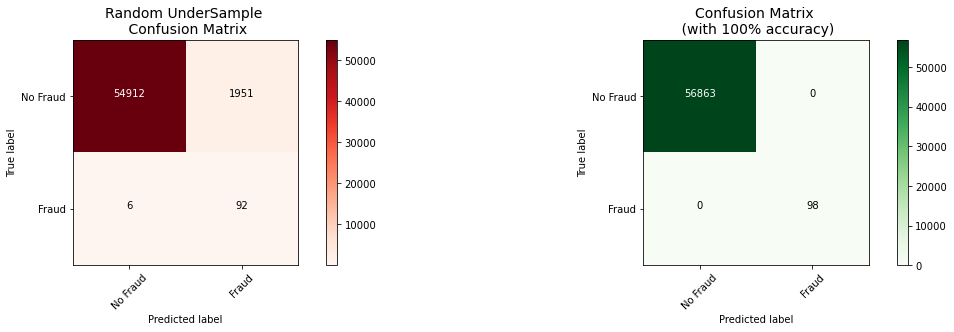

In [21]:
from sklearn.metrics import confusion_matrix
undersample_predictions = undersample_model.predict(original_Xtest, batch_size=200, verbose=0)
undersample_fraud_predictions = undersample_model.predict_classes(original_Xtest, batch_size=200, verbose=0)
undersample_cm = confusion_matrix(original_ytest, undersample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)